<목표> 

* 어떤승객이 생존에 유리했을까?? 

* 커스텀 데이터를 설정 해서 예측해보기

(#캐글참고 코드는 캐글에서 유용해 보이는 것을 가져온 코드)

한글폰트

In [1]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,800 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

런타임 다시시작

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 1. 구글 드라이브 연동 및 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# kaggle 사이트에서  다운을 받은후 구글드라이브에 저장하고 불러오는 방식
train = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')

# seaborn에서 데이터 셋 불러오는 방식
# titanic = sns.load_dataset('titanic')

# 2. 데이터 확인하기 

## 1) 데이터 형태 확인

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# pclass를 보면 3등급인 승객이 가장 많다고 생각해 볼 수 있다.
# Fare를 봤을때 가격의 차이가 크다는 것을 알 수 있다.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wright, Mr. George",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
test.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Cor, Mr. Ivan",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
# Age 와 Cabin 그리고 Embarked 이렇게 세개의 데이터에 nan값이 있다는 것을 알 수 있다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


nan값을 채울 컬럼은 :'Age', 'Fare', 'Embarked'

인코딩 해주어야 할 것 : 'Name', 'Sex', 'Age', 'Ticket', 'Fare'

## 2) 전처리 이전 데이터 셋의 시각화(컬럼이 생존에 미치는 영향 확인)

#### a. 성별에 따른 생존 비교

* 여성이 남성보다 생존을 하기에 유리했다.


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


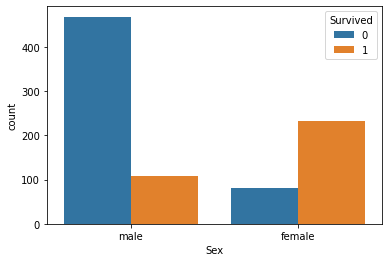

In [12]:
pre_sex = sns.countplot(data= train, x = 'Sex', hue = 'Survived')
pre_sex

#### b. 티켓 등급에 따른 생존 비교

* 1등급이 가장 많이 생존했으며 가장 적은 승객이 죽었으며 생존이 더 높은 유일한 등급이다
* 등급별 생존 비율 1등급 > 2등급 > 3등급

In [30]:
# 캐글 참고
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


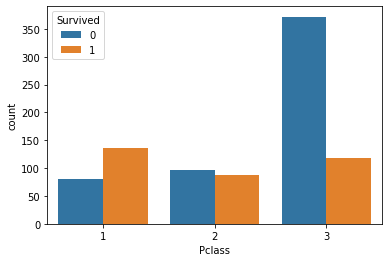

In [13]:
pre_pclass = sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
pre_pclass

#### c. 나이에 따른 생존 비교

* 나이는 추가적인 전처리가 필요할것 같다. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text major ticklabel objects>)

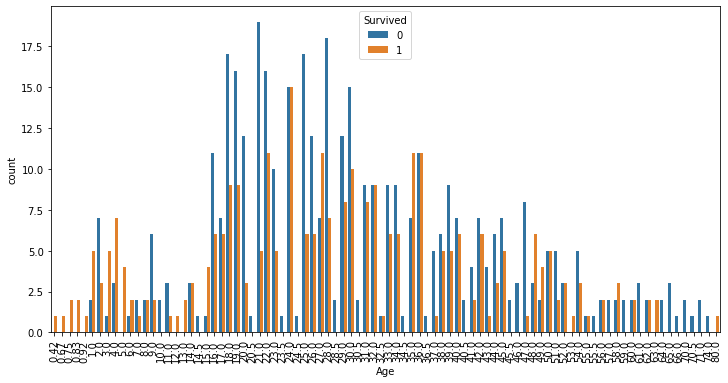

In [14]:
plt.figure(figsize = (12, 6))
pre_age = sns.countplot(data = train, x = 'Age', hue = 'Survived')
pre_age
plt.xticks(rotation = 90)

# 3. 데이터 전처리 

## Data Cleaning

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### a. Age의 nan값 처리.

 `평균 + 표준편차값을 Age의 nan값에 채워 주기로 했다.`
 
 `why?. 평균의 데이터를 넣기에는 평균 데이터가 
 급격하게 증가하기 때문에 0 혹은 평균값이 아닌 평균+표준편차를 사용 , 또한 이렇게 하게 되면 평균에 대한 값은 크게 변함이 없으면서도 어느정도 범위안에서 고르게 분포가 되기 때문에 최선의 방법이라고 생각`

In [18]:
# 평균 + 표준편차값을 Age의 nan값에 채워 주기로 했다.
# why?. 평균의 데이터를 넣기에는 평균치의 데이터가 
# 급격하게 증가하기 때문에 0이나 평균이 아닌 평균+표준편차를 사용 

# train set
age_size = train['Age'].isna().sum()
age_mean = train['Age'].mean()
age_std = train['Age'].std()

# test set
age_size2 = test['Age'].isna().sum()
age_mean2 = test['Age'].mean()
age_std2 = test['Age'].std()







np.random.seed(26)
fill_age = abs(np.random.randn(age_size)) * age_std + age_mean
fill_age

np.random.seed(26)
fill_age2 = abs(np.random.randn(age_size2)) * age_std2 + age_mean2
fill_age2

array([33.0520111 , 57.80166993, 40.39493159, 39.6626518 , 33.51813199,
       34.12634568, 30.68482323, 55.22559243, 41.53644905, 39.10213029,
       32.5322285 , 48.91100365, 43.83346446, 41.5621196 , 43.39323398,
       44.90727486, 38.55915966, 69.21313116, 37.32943258, 59.88452873,
       31.24861356, 34.15310448, 44.02742641, 45.07108987, 50.95386298,
       38.53501411, 39.34211438, 33.3014719 , 34.54893498, 41.7630786 ,
       44.92634186, 46.67296524, 39.35554991, 35.69466532, 57.55470962,
       51.24774673, 46.33430975, 33.01064184, 34.04944228, 40.72956586,
       34.39973329, 36.13606577, 35.73979845, 33.86579993, 38.54364011,
       40.53947757, 31.01663885, 49.62837274, 30.93274885, 42.16211794,
       34.419578  , 35.31076266, 34.23422125, 41.96731949, 30.79330537,
       39.19983372, 31.79772122, 60.22888259, 33.11914652, 31.082056  ,
       43.72640603, 46.31759783, 33.24415151, 62.06379974, 52.33711655,
       38.84373944, 31.9533932 , 46.06639214, 36.2562157 , 56.31

In [19]:
# train
train.loc[train['Age'].isna(), 'Age'] = fill_age
train['Age'].isna().sum()

# test
test.loc[test['Age'].isna(), 'Age'] = fill_age2
test['Age'].isna().sum()

0

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### b. Cabin의 nan값 처리

` Cabin의 경우 nan값이 전체 891개의 데이터중 600개가 넘는 데이터가 포함되며 다른 컬럼으로부터 유추가 불가능 하기때문에 컬럼을 삭제 `

In [22]:
train = train.drop('Cabin', axis = 1)
train.info()

test = test.drop('Cabin', axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

#### c. Embarked의 nan값 처리

` 이 데이터의 경우는 mode()를 통해 확인한 결과 최 빈값이 우월한 데이터가 있으며 오직 2개의 데이터가 누락되어 있으므로 가장 많은 데이터 셋으로 넣어준다 `

In [23]:
train['Embarked'].mode()
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
test['Embarked'].mode()
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [25]:
train['Embarked'] = train['Embarked'].fillna('S')
train.info()
test['Embarked'] = test['Embarked'].fillna('S')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

In [26]:
# test셋의 Fare가 한개의 결측값을 가지고 있고 단, 하나의 데이터 이므로 평균으로 채워주었다.
Fare_mean = test['Fare'].mean()
test['Fare']= test['Fare'].fillna(Fare_mean)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


이렇게 까지 하면 결측값들을 모두 채워둔 상태가 된다. 

이후는 모델에 넣기 위한 인코딩 작업을 해준다던가 중복되는 컬럼을 하나로 합치는 작업 및 필요없는 컬럼 축소 작업이 필요 할 것 같다

#### d. Ticket 컬럼 제거

In [27]:
# 해당 컬럼이 생존률과 연관이 없다고 판단
 
# train
train = train.drop('Ticket', axis =1)

# test
test = test.drop('Ticket', axis = 1)

## 데이터 합치기

#### Sibsp + Parch = Alone


Sibsp 와 Parch는 동승자 에 대한 데이터 이다. 따라서 동승자를 구간으로 나누어 인코딩 처리 하는것 보다 "혼자 탑승, 여럿 탑승" 으로 나누어 훨씬더 비교하기 쉬운 데이터로 만들어 줌. (두 개의 컬럼을 합쳐 새로운 컬럼 Alone으로 만들어준다.) 

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


먼저 두개의 데이터를 'Alone' 으로 합쳐보겠습니다 

In [29]:
# train
train['Alone'] = train['SibSp'] + train['Parch']
train['Alone']
train.head(10)

# test
test['Alone'] = test['SibSp'] + test['Parch']
test['Alone']
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,2


In [30]:
# train
train.drop(train[['SibSp','Parch']], axis = 1,inplace=True)

# test
test.drop(test[['SibSp','Parch']], axis =1,inplace=True )

In [31]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,32.546213,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,C,1


In [32]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,29.0000,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,24.1500,S,2


이제는 Alone을 혼자왔으면 0, 혼자가 아니면 1로 바꾸어 보겠습니다

In [33]:
# train
a = []

for i in train['Alone']:
  if i == 0:
    a.append(0)
  elif i != 0:
    a.append(1)

a

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [34]:
# test
b = []

for i in test['Alone']:
  if i == 0:
    b.append(0)
  elif i != 0:
    b.append(1)

b

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


In [35]:
train['Alone']  = a
train['Alone'].unique()


array([1, 0])

In [36]:
test['Alone']= b
test['Alone'].unique()


array([0, 1])

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Alone        418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


## 인코딩

Age변환

In [39]:
train['Age'] = train['Age'].astype(int)
train['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    51
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [40]:
test['Age'] = test['Age'].astype(int)
test['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    44
414    39
415    38
416    41
417    48
Name: Age, Length: 418, dtype: int64

Fare 변환 ( 소수점 첫째 자리에서 반올림 후 int형 변환)

In [41]:
# train
train['Fare'] = round(train['Fare'])
train['Fare']
train['Fare'] = train['Fare'].astype(int)
train['Fare']

# test
test['Fare'] = round(test['Fare'])
test['Fare']
test['Fare'] = test['Fare'].astype(int)
test['Fare']

0        8
1        7
2       10
3        9
4       12
      ... 
413      8
414    109
415      7
416      8
417     22
Name: Fare, Length: 418, dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 62.8+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 26.2+ KB


Name 변환 ( .(온점)앞의 이름으로 통일)

In [44]:
Name = []

for i in train['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name.append(h[:-1])

Name

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [45]:
Name_test = []

for i in test['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name_test.append(h[:-1])

Name_test

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [46]:
# train
train['Name'] = pd.Series(Name)
train['Name']

# test
test['Name'] = pd.Series(Name_test)
test['Name']


0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [47]:
# train
train['Name'].unique()

# test
test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

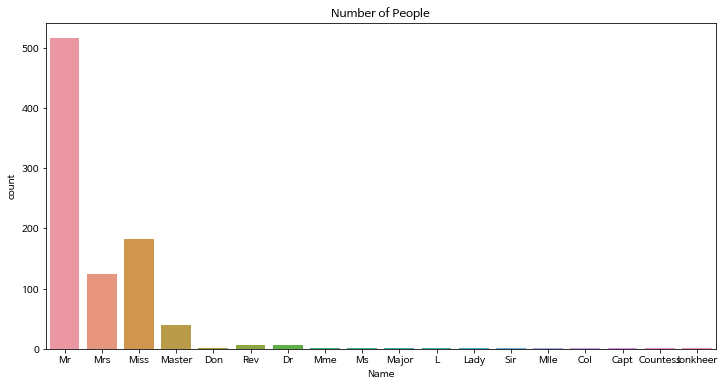

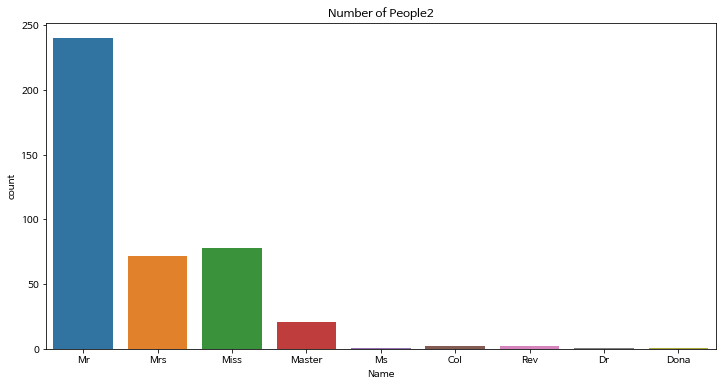

In [48]:
plt.figure(figsize = (12, 6))

sns.countplot(data= train, x = train['Name'])
plt.title('Number of People')

plt.figure(figsize = (12, 6))

sns.countplot(data = train, x = test['Name'])
plt.title('Number of People2')

plt.show()

` name의 구성을 보면 'Mr','Mrs','Miss','Master'가 대부분을 구성하고 나머지 많은 이름들은 극히 일부분이므로 Others로 통합 ` 

In [49]:
# train
train['Name'] = train['Name'].replace([ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Others')
train['Name'].unique()

# test
test['Name'] = test['Name'].replace(['Ms', 'Col', 'Rev', 'Dr', 'Dona'], 'Others')
test['Name'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

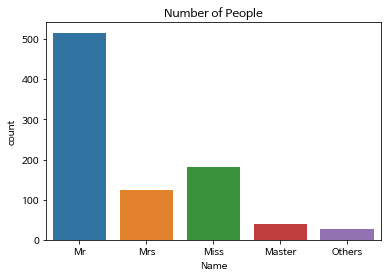

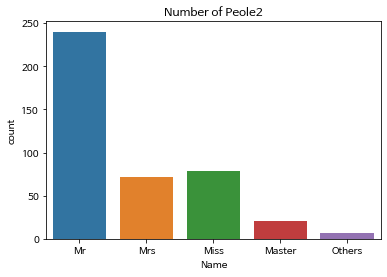

In [50]:
sns.countplot(data= train, x = 'Name')
plt.title('Number of People')

plt.figure()

sns.countplot(data = test, x = 'Name')
plt.title('Number of Peole2')

plt.show()

` 인코딩을 통해 int형 으로 만들어 주기 `

In [51]:
from sklearn.preprocessing import LabelEncoder

` Master : 0 , Miss : 1,  Mr : 2, Mrs : 3  Others : 4`




In [52]:
le = LabelEncoder()

# train
le.fit(train['Name'])
train['Name'] = le.transform(train['Name'])
train.head(10)

# test
le.fit(test['Name'])
test['Name'] = le.transform(test['Name'])
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,male,34,8,Q,0
1,893,3,3,female,47,7,S,1
2,894,2,2,male,62,10,Q,0
3,895,3,2,male,27,9,S,0
4,896,3,3,female,22,12,S,1
5,897,3,2,male,14,9,S,0
6,898,3,1,female,30,8,Q,0
7,899,2,2,male,26,29,S,1
8,900,3,3,female,18,7,C,0
9,901,3,2,male,21,24,S,1


In [53]:
train['Name'].unique()
test['Name'].unique()

array([2, 3, 1, 0, 4])

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 62.8+ KB


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 26.2+ KB


'Sex' 변환

In [56]:
# train
train['Sex'] = train['Sex'].map({'male': 0, 'female' : 1})
train['Sex']

# test
test['Sex'] = test['Sex'].map({'male': 0, 'female' : 1})
test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.2+ KB


'Embarked' 변환

In [59]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [60]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [61]:
# train
train.loc[train['Embarked'] == 'S', 'Embarked'].count()

# test
test.loc[test['Embarked'] == 'S', 'Embarked'].count()


270

In [62]:
# train
train.loc[train['Embarked'] == 'C', 'Embarked'].count()

# test
test.loc[test['Embarked'] == 'C', 'Embarked'].count()

102

` Survivded : 0 = 비생존 , 1 = 생존 `

` Embarked : Q = 1 , C = 0 , S = 2 `

` Pclass : 1 = 1등급, 2 = 2등급 , 3 = 3등급`

` Name : 0 = 'Master', 1 = 'Miss', 2 = 'Mr', 
3 =   'Mrs', 4 = 'Others' `

` Sex : 0  = male, 1 = female `

` Alone : 0 = 혼자, 1 = 둘 이상 `

In [63]:
le= LabelEncoder()

# train
le.fit(train['Embarked'])
train['Embarked'] =le.transform(train['Embarked']) 
train.head(10)

# test
le.fit(test['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,34,8,1,0
1,893,3,3,1,47,7,2,1
2,894,2,2,0,62,10,1,0
3,895,3,2,0,27,9,2,0
4,896,3,3,1,22,12,2,1
5,897,3,2,0,14,9,2,0
6,898,3,1,1,30,8,1,0
7,899,2,2,0,26,29,2,1
8,900,3,3,1,18,7,0,0
9,901,3,2,0,21,24,2,1


` 'Age' 와 'Fare' 의 인코딩이 필요 `

In [64]:
train['Age'].min()


0

In [65]:
test['Age'].min()

0

In [66]:
train['Age'].max()

80

In [67]:
test['Age'].max()

76

In [68]:
train.loc[train['Age'] == 0 , 'Age']

78     0
305    0
469    0
644    0
755    0
803    0
831    0
Name: Age, dtype: int64

In [69]:
test.loc[train['Age'] == 0 , 'Age']

78     30
305    64
Name: Age, dtype: int64

In [70]:
a = train.loc[train['Age'] == 0 , 'Age']
train.drop(a.index,inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,2,0,22,7,2,1
1,2,1,1,3,1,38,71,0,1
2,3,1,3,1,1,26,8,2,0
3,4,1,1,3,1,35,53,2,1
4,5,0,3,2,0,35,8,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27,13,2,0
887,888,1,1,4,1,19,30,2,0
888,889,0,3,1,1,51,23,2,1
889,890,1,1,1,0,26,30,0,0


In [71]:
b = test.loc[test['Age'] == 0 , 'Age']
test.drop(b.index,inplace=True)
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,34,8,1,0
1,893,3,3,1,47,7,2,1
2,894,2,2,0,62,10,1,0
3,895,3,2,0,27,9,2,0
4,896,3,3,1,22,12,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,2,0,44,8,2,0
414,1306,1,4,1,39,109,0,0
415,1307,3,2,0,38,7,2,0
416,1308,3,2,0,41,8,2,0


In [72]:
train['Age'].min()

1

In [73]:
test['Age'].min()

1

In [74]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,2,0,22,7,2,1
1,2,1,1,3,1,38,71,0,1
2,3,1,3,1,1,26,8,2,0
3,4,1,1,3,1,35,53,2,1
4,5,0,3,2,0,35,8,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27,13,2,0
887,888,1,1,4,1,19,30,2,0
888,889,0,3,1,1,51,23,2,1
889,890,1,1,1,0,26,30,0,0


In [75]:
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,34,8,1,0
1,893,3,3,1,47,7,2,1
2,894,2,2,0,62,10,1,0
3,895,3,2,0,27,9,2,0
4,896,3,3,1,22,12,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,2,0,44,8,2,0
414,1306,1,4,1,39,109,0,0
415,1307,3,2,0,38,7,2,0
416,1308,3,2,0,41,8,2,0


`16세 이하 = 0` 

`17세이상 32세 이하 = 1` 

`33세 이상 48세 이하 =2` 

`49세이상 64세 이하 = 3` 

`65세이상 80세 이하 = 4`

In [76]:
# train

#  16세 이하 = 0, 17세이상 32세 이하 = 1, 33세 이상 48세 이하 =2
#  49세이상 64세 이하 = 3, 65세이상 80세 이하 = 4


Age = []

for i in train['Age']:
  if i <= 16:
    Age.append(0)      
  elif i > 16 and i <= 32:
    Age.append(1)      
  elif i > 32 and i <= 48:
    Age.append(2)  
  elif i > 48 and i <= 64:
    Age.append(3)
  elif i > 64 and i <= 80:
    Age.append(4)
   
Age

[1,
 2,
 1,
 2,
 2,
 1,
 3,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 0,
 3,
 0,
 3,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 4,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 3,
 1,
 4,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 4,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 3,
 0,
 0,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 3,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 1,


In [77]:
# test
Age2 = []

for i in test['Age']:
  if i <= 16:
    Age2.append(0)      
  elif i > 16 and i <= 32:
    Age2.append(1)      
  elif i > 32 and i <= 48:
    Age2.append(2)  
  elif i > 48 and i <= 64:
    Age2.append(3)
  elif i > 64 and i <= 80:
    Age2.append(4)
   
Age2

[2,
 2,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 0,
 3,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 0,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 0,
 1,
 3,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,


In [78]:
# train
train['Age'] = Age
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,2,0,1,7,2,1
1,2,1,1,3,1,2,71,0,1
2,3,1,3,1,1,1,8,2,0
3,4,1,1,3,1,2,53,2,1
4,5,0,3,2,0,2,8,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,1,13,2,0
887,888,1,1,4,1,1,30,2,0
888,889,0,3,1,1,3,23,2,1
889,890,1,1,1,0,1,30,0,0


In [79]:
# test
test['Age'] = Age2
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,2,8,1,0
1,893,3,3,1,2,7,2,1
2,894,2,2,0,3,10,1,0
3,895,3,2,0,1,9,2,0
4,896,3,3,1,1,12,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,2,0,2,8,2,0
414,1306,1,4,1,2,109,0,0
415,1307,3,2,0,2,7,2,0
416,1308,3,2,0,2,8,2,0


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  884 non-null    int64
 1   Survived     884 non-null    int64
 2   Pclass       884 non-null    int64
 3   Name         884 non-null    int64
 4   Sex          884 non-null    int64
 5   Age          884 non-null    int64
 6   Fare         884 non-null    int64
 7   Embarked     884 non-null    int64
 8   Alone        884 non-null    int64
dtypes: int64(9)
memory usage: 69.1 KB


In [81]:
for i in train['Fare']:
  print(i)

7
71
8
53
8
8
52
21
11
30
17
27
8
31
8
16
29
13
18
7
26
13
8
36
21
31
7
263
8
8
28
147
8
10
82
52
7
8
18
11
9
21
8
42
8
8
16
8
22
18
40
8
77
26
62
36
10
7
28
47
7
80
83
28
28
15
10
8
8
9
10
47
74
14
56
8
8
8
12
9
10
8
47
10
16
34
8
263
8
8
8
61
21
7
8
35
63
23
26
8
8
77
9
8
8
8
8
8
24
52
14
8
10
14
8
8
21
248
31
74
8
30
13
77
11
8
7
22
7
8
7
14
26
13
15
26
53
9
79
15
8
16
7
12
37
8
34
26
13
13
67
8
14
7
61
8
8
9
70
16
16
8
9
40
21
55
28
26
56
34
29
11
8
31
8
25
29
13
0
70
15
31
39
22
50
16
27
16
8
13
13
8
26
28
147
8
8
8
13
10
70
6
7
8
10
16
19
8
31
7
21
7
13
8
113
8
27
76
10
8
13
8
8
90
9
10
7
13
25
83
8
14
31
10
8
26
26
10
12
14
16
10
7
7
90
8
14
53
26
7
10
27
16
20
15
79
86
512
26
8
31
80
0
8
10
40
8
153
136
31
0
20
30
8
78
8
0
29
20
8
8
10
8
26
9
10
8
13
8
79
91
13
9
8
28
7
152
30
248
8
23
0
12
8
111
109
24
57
83
262
26
8
26
8
26
14
165
134
7
8
12
29
70
136
6
13
21
58
23
28
153
18
134
8
67
134
8
36
26
263
13
13
13
13
13
16
16
9
9
35
7
18
7
10
55
13
8
8
28
28
14
7
16
7
75
7
8
69
55


In [82]:
train['Fare'].max()

512

요금은 클래스와 거리에 따른 값이기 때문에 제거

In [83]:
train.drop('Fare', axis = 1, inplace = True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Alone
0,1,0,3,2,0,1,2,1
1,2,1,1,3,1,2,0,1
2,3,1,3,1,1,1,2,0
3,4,1,1,3,1,2,2,1
4,5,0,3,2,0,2,2,0
...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,1,2,0
887,888,1,1,4,1,1,2,0
888,889,0,3,1,1,3,2,1
889,890,1,1,1,0,1,0,0


In [84]:
test.drop('Fare', axis = 1, inplace = True)
test

,PassengerId,Pclass,Name,Sex,Age,Embarked,Alone
0,892,3,2,0,2,1,0
1,893,3,3,1,2,2,1
2,894,2,2,0,3,1,0
3,895,3,2,0,1,2,0
4,896,3,3,1,1,2,1
...,...,...,...,...,...,...,...
413,1305,3,2,0,2,2,0
414,1306,1,4,1,2,0,0
415,1307,3,2,0,2,2,0
416,1308,3,2,0,2,2,0


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  884 non-null    int64
 1   Survived     884 non-null    int64
 2   Pclass       884 non-null    int64
 3   Name         884 non-null    int64
 4   Sex          884 non-null    int64
 5   Age          884 non-null    int64
 6   Embarked     884 non-null    int64
 7   Alone        884 non-null    int64
dtypes: int64(8)
memory usage: 62.2 KB


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  413 non-null    int64
 1   Pclass       413 non-null    int64
 2   Name         413 non-null    int64
 3   Sex          413 non-null    int64
 4   Age          413 non-null    int64
 5   Embarked     413 non-null    int64
 6   Alone        413 non-null    int64
dtypes: int64(7)
memory usage: 25.8 KB


# 전처리 이후 시각화

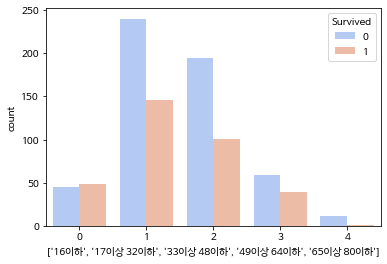

In [94]:
x_label = ['16이하', '17이상 32이하', '33이상 48이하', '49이상 64이하', '65이상 80이하']
sns.countplot(data= train , x = 'Age', hue = 'Survived',palette='coolwarm')
plt.xlabel(x_label)
plt.show()


# 머신러닝 모델 사용